<a href="https://colab.research.google.com/github/BinAl-Sadiq/.idx/blob/main/day1_Linear_Regression_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output

In [2]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install numpy
%pip install scikit-learn
%pip install matplotlib
######
clear_output()

In [3]:
import math

import numpy as np
import matplotlib.pyplot as plt

# Sklearn has implementations of multiple types of models. We'll be using LinearRegression API in it
# For documentation on LinearRegression, visit here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

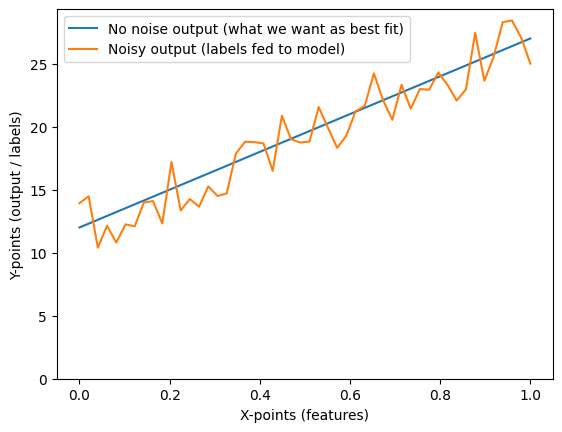

In [15]:
# Let's make some custom points (which would act as our dataset)
# starting with a function with highest polynomial degree of 1

# y = w0 + w1*x1

w0 = 12  # bias
w1 = 15  # first degree co-efficient
noise_scale_factor = 5  # the higher this is, the rougher and farther the noisy output is from the best fit
num_points = 50  # number of samples in data

x_points = np.linspace(0, 1, num_points)  # num_points points from 0 to 1
y_points_no_noise = w0 + w1*x_points  # The actual features which we'd feed to model will have slight noise
noise = noise_scale_factor * (np.random.rand(*y_points_no_noise.shape)-0.5)  # Look at the explanation below to see how this is calculated

#############################
# TODO, add noise
y_points = y_points_no_noise + noise
#############################

plt.plot(x_points, y_points_no_noise, label='No noise output (what we want as best fit)')
plt.plot(x_points, y_points, label='Noisy output (labels fed to model)')
_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top)  # 0 bottom makes it easy to visualize bias term

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

#Contents:

1. Implement 1 polynomial degree Linear Regression model from scratch (using numpy)
2. Implement the same model using sklearn
3. Take a complex function and try fitting a multi-polynomial degree Linear regression model on it.


You need to know:

1. **numpy** (for impelementation)
2. a little bit of **matplotlib** (for visualization)


Good to have knowledge of:

1. Sklearn (details of the functions is given anyways)

## Implementing Linear Regression from Scratch (Using numpy)

### Explanation:

```python
noise_scale_factor = 5
noise = noise_scale_factor * (np.random.rand(*y_points_no_noise.shape)-0.5)
y_points = y_points_no_noise + noise
```

- np.random.rand(*y_points_no_noise) generates an array of random values in range [0, 1) of the same shape as y_points_no_noise
- we subtract 0.5 from it to bring it to range [-0.5, 0.5) (so there are also some values below the line after noise is added)
- it might be possible that the values of w0, w1 or y_points is big enough for a noise point of [-0.5, 0.5) to not make much dent (for example, if a label is 1000, changing it to 1000.5 or 999.5 doesn't make much different) so we scale it with a scaling factor
- The calculated noise is added to noise-less y_points

In [20]:
np.array([x_points**i for i in range(2)]).shape

(2, 50)

In [ ]:
# Custom calculating best fit

num_bases = 1  # number of coefficient to polynomial terms (not including bias). We'll pick 1 since our original function had highest order term of 1

A = [x_points**i for i in range(num_bases+1)]  # +1 in num_bases for bias
A = np.array(A).T  # (m, n) matrix where m is number of samples and n is number of params (including bias). In our case, n is 2


# Solve for w to find our params
# Upper case: matrices. Lower case: vectors

#  Aw = y
#  Aᵀ(Aw) = Aᵀy  =>  AᵀAw = Aᵀy
#  w = (AᵀA)⁻¹Aᵀy

#############################
# TODO, calcuate the w (param)
w = np.array.inv(A.T @ A) @ A.T @ y_points
#############################
y_pred = A @ w  # calculate predictions using our optimized coefficient params and bias

# Visualize the results

#############################
# TODO, plot the data with no noise
plt.plot(x_points, ?? , label='data points without the noise (our goal)')
#############################

plt.plot(x_points, y_points, 'x', label='points in data (with noise)')
plt.plot(x_points, y_pred, label='prediction')

_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top+10)  # 0 bottom makes it easy to visualize bias term (intercept)

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

In [ ]:
print(f'Actual weight values we used: {(w0, w1)}')
print(f'Values calculated by Model: {tuple(w)}')

## Let's now use sklearn to do this

In [ ]:
model = LinearRegression(fit_intercept=True)
model = model.fit(x_points.reshape(-1, 1), y_points)  # fit is used to train the model on the data.

### Explanation

**fit_intercept=True**: This is used to tell the model that we also expect to calculate the intercept.
For cases where the data is centralized during pre-processing, this value can be False since the intercept in that case is 0.
But since that's not the case with us, we want the model to calculate it

**x_points.reshape(-1, 1)**: Sklearn expects input features to be of the shape (m, n) where m is the number of samples and n is the number of features.
Since the array we generated is of the shape (n,), we need to reshape it to (n, 1). This does not change the values, only the shape. Sklearn throws an error if we don't do this

In [ ]:
#############################
#TODO, predict the output
y_pred = ??                    # Predict is used to prediction labels/outputs from feature inputs.
#############################

Note: Normally it's a good idea to predict a separate set of data not seen during training (validation data), but here we're just looking at the basic implementation using sklearn so training data would also do

In [ ]:
plt.plot(x_points, y_points_no_noise, label='data points without the noise (our goal)')
plt.plot(x_points, y_points, 'x', label='points in data (with noise)')
plt.plot(x_points, y_pred, label='prediction')

_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top+10)
plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

In [ ]:
print(f'Expected coefficients/matrices:           {(w0, w1)}')

# we have to do [0] on coef_ because coef_ itself is a matrix of all the coeffifients. In our case, coef_ just has one length but it's still an array.
# [0] brings out the value from array which means better printing

#############################
# TODO, complete the statement
print(f'Sklearn calculated coefficients/matrices: {(model.intercept_, ??)}')
#############################



## Let's step up the game with more complex functions

In [ ]:
noise_scale_factor = 1.5
num_points = 100
sin_wave_ub = 3  # upper bound of sin wave y output. negative of this value would also be lower bound. (negative value here would make this a cosine wave)

#############################
# TODO, make x range between -1 and 1
x_points = ??
#############################
y_points_no_noise = sin_wave_ub * np.sin(x_points*math.pi)

noise = noise_scale_factor * (np.random.rand(*y_points_no_noise.shape)-0.5)
y_points = y_points_no_noise + noise

plt.plot(x_points, y_points_no_noise, label='No noise output')
plt.plot(x_points, y_points, label='Noisy output (labels fed to model)')

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

#### Custom fitting with variable number of bases

In [ ]:
# Custom calculating best fit


min_num_bases = 1
max_num_bases = 6


assert min_num_bases <= max_num_bases, "min_num_bases must be lesser or equal to max_num_bases. :|"

bases_preds = []

for num_bases in range(min_num_bases, max_num_bases+1):
  #############################
  # TODO, implement feature engineering to find A
  A = ??
  #############################
  A = np.array(A).T

  # Solve for w to find our params
  # Upper case: matrices. Lower case: vectors

  #  Aw = y
  #  Aᵀ(Aw) = Aᵀy  =>  AᵀAw = Aᵀy
  #  w = (AᵀA)⁻¹Aᵀy

  w = np.linalg.inv(A.T @ A) @ (A.T @ y_points)
  #############################
  #TODO, predict
  y_pred = ??
  #############################
  bases_preds.append(y_pred)


fig, axes = plt.subplots(len(bases_preds), 1, figsize=(20, 10*len(bases_preds)))

for i, (num_bases, preds) in enumerate(zip(range(min_num_bases, max_num_bases+1), bases_preds)):

    axes[i].set_title(f'Num Bases = {num_bases}')

    # Visualize the results
    axes[i].plot(x_points, y_points_no_noise, label='data points without the noise (our goal)')
    axes[i].plot(x_points, y_points, 'x',     label='points in data (with noise)')
    axes[i].plot(x_points, bases_preds[i],    label='prediction')

    axes[i].set_xlabel('X-points (features)')
    axes[i].set_ylabel('Y-points (output / labels)')

    axes[i].legend()

plt.show()